# 第七题代码

In [2]:
pip install ucimlrepo


  Attempting uninstall: certifi
    Found existing installation: certifi 2020.6.20
    Uninstalling certifi-2020.6.20:
      Successfully uninstalled certifi-2020.6.20


ERROR: Exception:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "D:\anaconda\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "D:\anaconda\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "D:\anaconda\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "D:\anaconda\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "D:\anaconda\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "D:\anaconda\lib\site-packages\pip\_vendor\packaging\version.py", line 202, in __init__
    raise InvalidVersion(f"Invali

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

数据集形状: (150, 4)
特征数: 4 (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm))
样本数: 150
类别数: 3 (setosa, versicolor, virginica)
类别分布: {'setosa': 50, 'versicolor': 50, 'virginica': 50}

训练集大小: 105 个样本 (70.0%)
测试集大小: 45 个样本 (30.0%)

支持向量机 (SVM)
  训练时间: 0.0033 秒
  交叉验证准确率 (5折): 0.9714 (±0.0233)

神经网络 (MLP)
  训练时间: 0.0096 秒
  交叉验证准确率 (5折): 0.3333 (±0.0000)
  最终损失值: 1.1458

随机森林 (Random Forest) 
  训练时间: 0.1401 秒
  交叉验证准确率 (5折): 0.9524 (±0.0301)
  树的数量: 100
  特征重要性: {'sepal length (cm)': 0.1206, 'sepal width (cm)': 0.0243, 'petal length (cm)': 0.4002, 'petal width (cm)': 0.4549}

SVM 测试结果:
  准确率: 0.9333
  精确率: 0.9345
  召回率: 0.9333
  F1分数: 0.9333

  分类报告:
    setosa: 精确率=1.000, 召回率=1.000, F1=1.000
    versicolor: 精确率=0.875, 召回率=0.933, F1=0.903
    virginica: 精确率=0.929, 召回率=0.867, F1=0.897

Neural Network 测试结果:
  准确率: 0.3333
  精确率: 0.1111
  召回率: 0.3333
  F1分数: 0.1667

  分类报告:
    setosa: 精确率=0.000, 召回率=0.000, F1=0.000
    versicolor: 精确率=0.333, 召回率=1.000, F1=0.500
    virgini

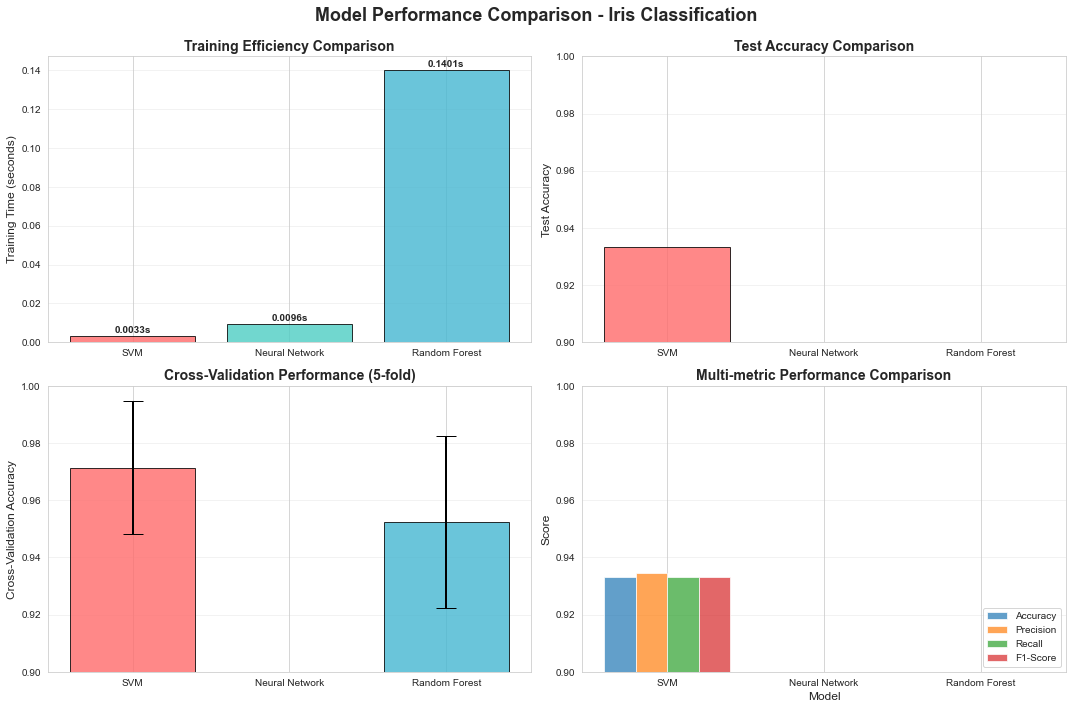

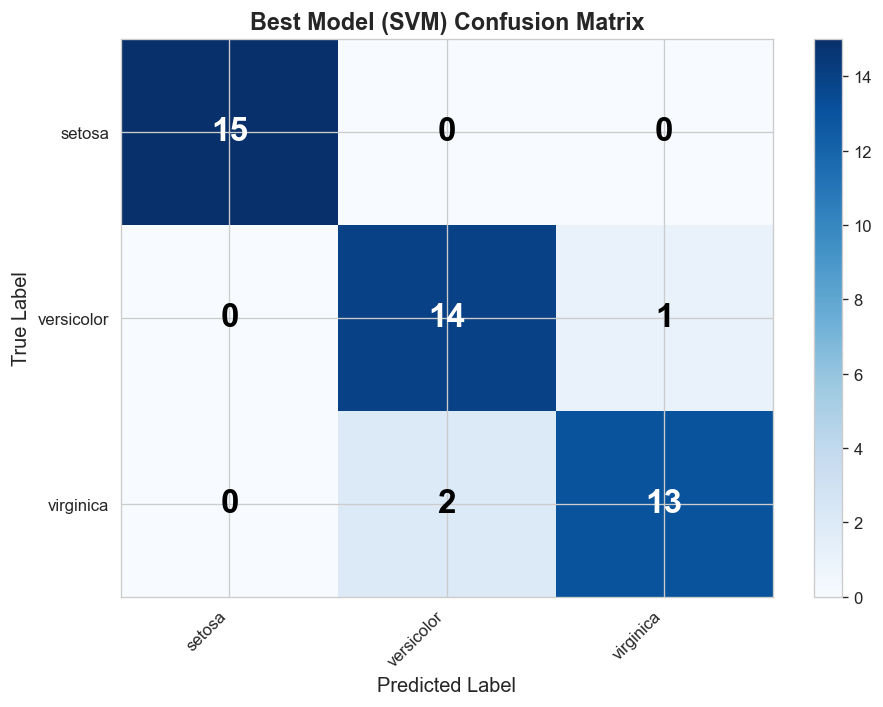

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, classification_report, confusion_matrix, roc_curve, auc)
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# 1. 数据加载与预处理
# 加载数据
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"数据集形状: {X.shape}")
print(f"特征数: {X.shape[1]} ({', '.join(feature_names)})")
print(f"样本数: {X.shape[0]}")
print(f"类别数: {len(target_names)} ({', '.join(target_names)})")

# 查看类别分布
unique, counts = np.unique(y, return_counts=True)
print(f"类别分布: {dict(zip([target_names[i] for i in unique], counts))}")

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n训练集大小: {X_train.shape[0]} 个样本 ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"测试集大小: {X_test.shape[0]} 个样本 ({X_test.shape[0]/len(X)*100:.1f}%)")

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2. 模型训练与调优
models = {}
training_times = {}
cv_scores = {}

model_name_map = {
    'SVM': 'SVM',
    '神经网络': 'Neural Network',
    '随机森林': 'Random Forest'
}

# 2.1 SVM模型
print("\n支持向量机 (SVM)")
svm_model = SVC(
    kernel='rbf', 
    C=1.0, 
    gamma='scale', 
    probability=True,
    random_state=42
)

# 记录训练时间
start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
svm_train_time = time.time() - start_time
training_times['SVM'] = svm_train_time

# 交叉验证
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores['SVM'] = svm_cv_scores.mean()

print(f"  训练时间: {svm_train_time:.4f} 秒")
print(f"  交叉验证准确率 (5折): {svm_cv_scores.mean():.4f} (±{svm_cv_scores.std():.4f})")

models['SVM'] = svm_model

# 2.2 神经网络模型
print("\n神经网络 (MLP)")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(10, 5),  
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# 记录训练时间
start_time = time.time()
mlp_model.fit(X_train_scaled, y_train)
mlp_train_time = time.time() - start_time
training_times['Neural Network'] = mlp_train_time

# 交叉验证
mlp_cv_scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores['Neural Network'] = mlp_cv_scores.mean()

print(f"  训练时间: {mlp_train_time:.4f} 秒")
print(f"  交叉验证准确率 (5折): {mlp_cv_scores.mean():.4f} (±{mlp_cv_scores.std():.4f})")
print(f"  最终损失值: {mlp_model.loss_:.4f}")

models['Neural Network'] = mlp_model

# 2.3 随机森林模型
print("\n随机森林 (Random Forest) ")
rf_model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=None,        
    min_samples_split=2,   
    min_samples_leaf=1,    
    max_features='sqrt',   
    random_state=42,
    n_jobs=-1             
)

# 记录训练时间
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
rf_train_time = time.time() - start_time
training_times['Random Forest'] = rf_train_time

# 交叉验证
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores['Random Forest'] = rf_cv_scores.mean()

print(f"  训练时间: {rf_train_time:.4f} 秒")
print(f"  交叉验证准确率 (5折): {rf_cv_scores.mean():.4f} (±{rf_cv_scores.std():.4f})")
print(f"  树的数量: {rf_model.n_estimators}")
print(f"  特征重要性: {dict(zip(feature_names, rf_model.feature_importances_.round(4)))}")

models['Random Forest'] = rf_model



# 3. 模型测试与评估

# 在测试集上进行预测
predictions = {}
prediction_probas = {}
metrics = {}

for name, model in models.items():
    # 预测
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    
    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # 存储指标
    metrics[name] = {
        '准确率': accuracy,
        '精确率': precision,
        '召回率': recall,
        'F1分数': f1
    }
    
    # 输出结果
    print(f"\n{name} 测试结果:")
    print(f"  准确率: {accuracy:.4f}")
    print(f"  精确率: {precision:.4f}")
    print(f"  召回率: {recall:.4f}")
    print(f"  F1分数: {f1:.4f}")
    
    # 分类报告
    print(f"\n  分类报告:")
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    for class_name in target_names:
        print(f"    {class_name}: 精确率={report[class_name]['precision']:.3f}, "
              f"召回率={report[class_name]['recall']:.3f}, F1={report[class_name]['f1-score']:.3f}")


# 4. 综合性能指标比较与可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison - Iris Classification', fontsize=18, fontweight='bold', y=0.98)

model_names = list(models.keys())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 1. 训练时间比较 (左上)
ax1 = axes[0, 0]
train_times = [training_times[name] for name in model_names]
bars1 = ax1.bar(model_names, train_times, color=colors, edgecolor='black', alpha=0.8)
ax1.set_ylabel('Training Time (seconds)', fontsize=12)
ax1.set_title('Training Efficiency Comparison', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
            f'{height:.4f}s', ha='center', va='bottom', fontweight='bold')

# 2. 测试准确率比较 (右上)
ax2 = axes[0, 1]
test_accuracies = [metrics[name]['准确率'] for name in model_names]
bars2 = ax2.bar(model_names, test_accuracies, color=colors, edgecolor='black', alpha=0.8)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim([0.9, 1.0])
ax2.grid(axis='y', alpha=0.3)


# 3. 交叉验证准确率比较 (左下)
ax3 = axes[1, 0]
cv_accuracies = [cv_scores[name] for name in model_names]
cv_errors = [cv_scores.std() for cv_scores in [svm_cv_scores, mlp_cv_scores, rf_cv_scores]]
bars3 = ax3.bar(model_names, cv_accuracies, yerr=cv_errors, capsize=10, 
                color=colors, edgecolor='black', alpha=0.8, error_kw={'elinewidth': 2})
ax3.set_ylabel('Cross-Validation Accuracy', fontsize=12)
ax3.set_title('Cross-Validation Performance (5-fold)', fontsize=14, fontweight='bold')
ax3.set_ylim([0.9, 1.0])
ax3.grid(axis='y', alpha=0.3)


# 4. F1分数比较（多类别）(右下)
ax4 = axes[1, 1]
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics_list):
    if metric == 'Accuracy':
        values = [metrics[name]['准确率'] for name in model_names]
    elif metric == 'Precision':
        values = [metrics[name]['精确率'] for name in model_names]
    elif metric == 'Recall':
        values = [metrics[name]['召回率'] for name in model_names]
    elif metric == 'F1-Score':
        values = [metrics[name]['F1分数'] for name in model_names]
    offset = (i - len(metrics_list)/2 + 0.5) * width
    ax4.bar(x + offset, values, width, label=metric, alpha=0.7)

ax4.set_xlabel('Model', fontsize=12)
ax4.set_ylabel('Score', fontsize=12)
ax4.set_title('Multi-metric Performance Comparison', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(model_names)
ax4.legend(loc='lower right', fontsize=10)  
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0.9, 1.0])
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

# 5. 混淆矩阵比较 
fig6, ax6 = plt.subplots(figsize=(8, 6), dpi=120)
best_model_name = max(metrics, key=lambda x: metrics[x]['F1分数'])
best_model = models[best_model_name]
y_pred_best = predictions[best_model_name]

cm = confusion_matrix(y_test, y_pred_best)
im = ax6.imshow(cm, interpolation='nearest', cmap='Blues', aspect='auto')
ax6.set_xlabel('Predicted Label', fontsize=12)
ax6.set_ylabel('True Label', fontsize=12)
ax6.set_title(f'Best Model ({best_model_name}) Confusion Matrix', fontsize=14, fontweight='bold')
ax6.set_xticks(range(len(target_names)))
ax6.set_yticks(range(len(target_names)))
ax6.set_xticklabels(target_names, rotation=45, ha='right')
ax6.set_yticklabels(target_names)

# 添加数值标签
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax6.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontweight='bold',
                fontsize=20)  
plt.colorbar(im, ax=ax6)
plt.tight_layout()
plt.show()

# 第九题代码

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# 读取数据
train_df = pd.read_excel("回归预测.xlsx", sheet_name="训练集", header=None)
test_df = pd.read_excel("回归预测.xlsx", sheet_name="测试集", header=None)

# 前30列为数值特征，第31列为药物类型，第32列为目标变量
X_train = train_df.iloc[:, :30].copy()  
drug_train = train_df.iloc[:, 30].copy()  
y_train = train_df.iloc[:, 31].copy()    

X_test = test_df.iloc[:, :30].copy()     
drug_test = test_df.iloc[:, 30].copy()   
y_test = test_df.iloc[:, 31].copy()      

feature_columns = [f'feature_{i+1}' for i in range(30)]
X_train.columns = feature_columns
X_test.columns = feature_columns

# 对药物类型进行独热编码
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
all_drugs = pd.concat([drug_train, drug_test], axis=0).values.reshape(-1, 1)
encoder.fit(all_drugs)
drug_train_encoded = encoder.transform(drug_train.values.reshape(-1, 1))
drug_test_encoded = encoder.transform(drug_test.values.reshape(-1, 1))
drug_columns = [f'drug_{category}' for category in encoder.categories_[0]]
drug_train_df = pd.DataFrame(drug_train_encoded, columns=drug_columns, index=X_train.index)
drug_test_df = pd.DataFrame(drug_test_encoded, columns=drug_columns, index=X_test.index)

X_train = pd.concat([X_train, drug_train_df], axis=1)
X_test = pd.concat([X_test, drug_test_df], axis=1)

# 标准化数值特征（只对前30个数值特征进行标准化，不对独热编码特征标准化）
scaler = StandardScaler()
# 只标准化前30个数值特征
X_train_numeric = scaler.fit_transform(X_train.iloc[:, :30])
X_test_numeric = scaler.transform(X_test.iloc[:, :30])

# 将标准化后的数值特征与独热编码特征合并
X_train_scaled = np.hstack([X_train_numeric, X_train.iloc[:, 30:].values])
X_test_scaled = np.hstack([X_test_numeric, X_test.iloc[:, 30:].values])

# 定义模型和参数网格
models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2'],
            'bootstrap': [True, False]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 4, 5],
            'max_features': ['sqrt', 'log2']
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [4, 5, 6],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200, 300, 500],
            'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
            'loss': ['linear', 'square', 'exponential']
        }
    }
}

results = {}
best_model = None
best_score = np.inf

for name, config in models.items():
    try:
        # 使用网格搜索进行超参数调优
        gs = GridSearchCV(
            config['model'], 
            config['params'], 
            cv=5, 
            scoring='neg_mean_squared_error', 
            n_jobs=-1,
            verbose=1  
        )
        
        gs.fit(X_train_scaled, y_train)
        y_pred = gs.best_estimator_.predict(X_test_scaled)
        
        # 计算各种误差指标
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        relative_errors = np.abs((y_test - y_pred) / y_test)
        mean_re = np.mean(relative_errors)
        std_re = np.std(relative_errors)
        
        # 计算即平方误差的标准差
        squared_errors = (y_test - y_pred) ** 2
        std_squared_errors = np.std(squared_errors)
        
        # 存储结果
        results[name] = {
            'best_params': gs.best_params_,
            'MSE': mse,
            'Mean_Relative_Error': mean_re,
            'Std_Relative_Error': std_re,
            'Std_Squared_Errors': std_squared_errors,  
            'model': gs.best_estimator_
        }
        
        print(f"=== {name} ===")
        print(f"最佳参数: {gs.best_params_}")
        print(f"MSE: {mse:.4f}")
        print(f"平均相对误差: {mean_re:.4f}")
        print(f"平方误差标准差: {std_squared_errors:.4f}")
        print(f"相对误差标准差: {std_re:.4f}")

        if mse < best_score:
            best_score = mse
            best_model = gs.best_estimator_
            
    except Exception as e:
        print(f"训练 {name} 时出错: {e}")
        continue

# 结果比较
comparison_data = []
for name, metrics in results.items():
    comparison_data.append({
        'Model': name,
        'MSE': f"{metrics['MSE']:.4f}",
        'Mean_RE': f"{metrics['Mean_Relative_Error']:.4f}",
        'Std_SE': f"{metrics['Std_Squared_Errors']:.4f}" , 
        'Std_RE': f"{metrics['Std_Relative_Error']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n")
print("模型性能比较:")
print(comparison_df.to_string(index=False))

# 最终报告内容
print("测试样本误差分析：")
y_pred_best = best_model.predict(X_test_scaled)

# 计算各种误差
absolute_errors = np.abs(y_test - y_pred_best)
relative_errors_best = np.abs((y_test - y_pred_best) / y_test)
squared_errors_best = (y_test - y_pred_best) ** 2

print(f"最佳模型: {best_model.__class__.__name__}")

print("\n1. 绝对误差统计:")
print(f"   绝对误差均值: {np.mean(absolute_errors):.4f}")
print(f"   绝对误差方差: {np.var(absolute_errors):.4f}")

print("\n2. 相对误差统计:")
print(f"   相对误差均值: {np.mean(relative_errors_best):.4f}")
print(f"   相对误差方差: {np.var(relative_errors_best):.4f}")

print("\n3. 平方误差统计:")
print(f"   平方误差均值: {np.mean(squared_errors_best):.4f}")
print(f"   平方误差方差: {np.var(squared_errors_best):.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
=== RandomForest ===
最佳参数: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 275.5931
平均相对误差: 0.2198
平方误差标准差: 522.8455
相对误差标准差: 0.1829
Fitting 5 folds for each of 54 candidates, totalling 270 fits
=== GradientBoosting ===
最佳参数: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}
MSE: 282.7105
平均相对误差: 0.2211
平方误差标准差: 551.2153
相对误差标准差: 0.1879
Fitting 5 folds for each of 108 candidates, totalling 540 fits
=== XGBoost ===
最佳参数: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
MSE: 316.9079
平均相对误差: 0.2307
平方误差标准差: 612.1935
相对误差标准差: 0.1961
Fitting 5 folds for each of 75 candidates, totalling 375 fits
=== AdaBoost ===
最佳参数: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 50}
MSE: 268.5221
平均相对误差: 0.2274
平方误差标准差: 490.8280
相对误差标准差: 0.1894


模型性能比较:
           Model      MSE Mean_

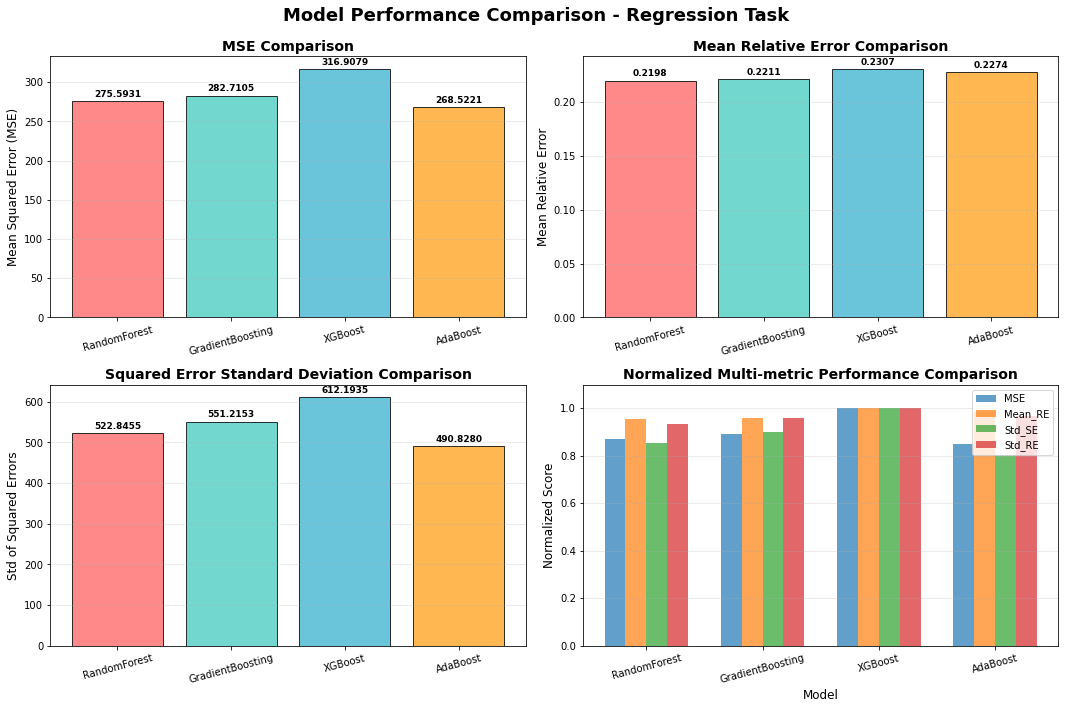

In [10]:
# 性能比较图
# 准备数据
model_names = list(results.keys())
mse_values = [results[name]['MSE'] for name in model_names]
mean_re_values = [results[name]['Mean_Relative_Error'] for name in model_names]
std_re_values = [results[name]['Std_Relative_Error'] for name in model_names]
std_se_values = [results[name]['Std_Squared_Errors'] for name in model_names]  

# 创建综合性能指标比较图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison - Regression Task', fontsize=18, fontweight='bold', y=0.98)

# 设置配色方案
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA726']

# 1. MSE比较 (左上)
ax1 = axes[0, 0]
bars1 = ax1.bar(model_names, mse_values, color=colors, edgecolor='black', alpha=0.8)
ax1.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax1.set_title('MSE Comparison', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=15)

# 在柱状图上添加数值标签
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(mse_values)*0.01,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. 平均相对误差比较 (右上)
ax2 = axes[0, 1]
bars2 = ax2.bar(model_names, mean_re_values, color=colors, edgecolor='black', alpha=0.8)
ax2.set_ylabel('Mean Relative Error', fontsize=12)
ax2.set_title('Mean Relative Error Comparison', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=15)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(mean_re_values)*0.01,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. 平方误差标准差比较 (左下)
ax3 = axes[1, 0]
bars3 = ax3.bar(model_names, std_se_values, color=colors, edgecolor='black', alpha=0.8)  
ax3.set_ylabel('Std of Squared Errors', fontsize=12)  
ax3.set_title('Squared Error Standard Deviation Comparison', fontsize=14, fontweight='bold')  
ax3.grid(axis='y', alpha=0.3)
ax3.tick_params(axis='x', rotation=15)

for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(std_se_values)*0.01,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 4. 多指标综合比较 (右下)
ax4 = axes[1, 1]
metrics_list = ['MSE', 'Mean_RE', 'Std_SE', 'Std_RE']  
x = np.arange(len(model_names))
width = 0.18

# 归一化处理，便于在同一图表中比较
norm_mse = [val/max(mse_values) for val in mse_values]
norm_mean_re = [val/max(mean_re_values) for val in mean_re_values]
norm_std_re = [val/max(std_re_values) for val in std_re_values]
norm_std_se = [val/max(std_se_values) for val in std_se_values]  

# 绘制归一化柱状图
metrics_data = {
    'MSE': norm_mse,
    'Mean_RE': norm_mean_re,
    'Std_SE': norm_std_se,  
    'Std_RE': norm_std_re
}

for i, (metric, values) in enumerate(metrics_data.items()):
    offset = (i - len(metrics_list)/2 + 0.5) * width
    bars = ax4.bar(x + offset, values, width, label=metric, alpha=0.7)

ax4.set_xlabel('Model', fontsize=12)
ax4.set_ylabel('Normalized Score', fontsize=12)
ax4.set_title('Normalized Multi-metric Performance Comparison', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(model_names, rotation=15)
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0, 1.1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()